In [28]:
from pathlib import Path
import os

import pytesseract
from PIL import Image, ImageDraw

REPO_DIR = Path(os.path.realpath("")).parent
print(REPO_DIR)

/home/jeremy/projects/side_projects/invoice-reader


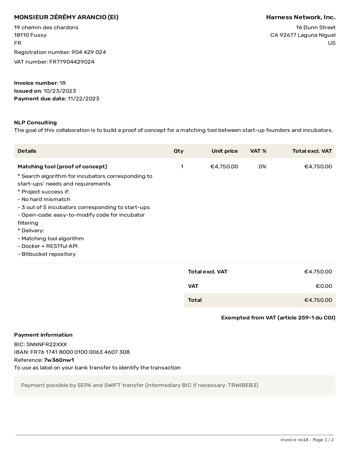

In [75]:
image = Image.open(REPO_DIR / ".private/invoice.png").convert("RGB")
image.resize((350,450))

In [65]:
text = pytesseract.image_to_string(image)
print(text)

MONSIEUR JEREMY ARANCIO (El) Harness Network, Inc.

19 chemin des chardons 16 Dunn Street
18110 Fussy CA 92677 Laguna Niguel
FR US

Registration number: 904 429 024
VAT number: FR77904429024

Invoice number: 18
Issued on: 10/23/2023
Payment due date: 11/22/2023

NLP Consulting
The goal of this collaboration is to build a proof of concept for a matching tool between start-up founders and incubators.

Details Qty Unit price VAT % Total excl. VAT

Matching tool (proof of concept) 1 €4,750.00 0% €4,750.00

* Search algorithm for incubators corresponding to
start-ups’ needs and requirements

* Project success if:

- No hard mismatch

- 3 out of 5 incubators corresponding to start-ups
- Open-code: easy-to-modify code for incubator
filtering

* Delivery:

- Matching tool algorithm

- Docker + RESTful API

- Bitbucket repository
Total excl. VAT €4,750.00
VAT €0.00
Total €4,750.00

Exempted from VAT (article 259-1 du CGI)

Payment information

BIC: SNNNFR22XXX

IBAN: FR76 1741 8000 0100 0063 46

In [53]:
def normalize_bbox(bbox, width, height):
    return [
        int(1000 * (bbox[0] / width)),
        int(1000 * (bbox[1] / height)),
        int(1000 * (bbox[2] / width)),
        int(1000 * (bbox[3] / height)),
    ]

M 69 2242 89 2264 0
O 93 2242 112 2264 0
N 115 2242 132 2264 0
S 127 2242 146 2264 0
I 136 2242 163 


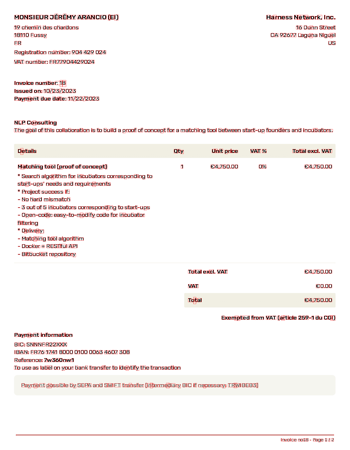

In [76]:
# For each character
image = Image.open(REPO_DIR / ".private/invoice.png").convert("RGB")
boxes = pytesseract.image_to_boxes(image)
print(boxes[:100])
draw = ImageDraw.Draw(image)
width, height = image.size
for box in boxes.splitlines():
    b = box.split(" ")
    bbox = (int(b[1]), height - int(b[4]), int(b[3]), height - int(b[2]))
    # normalized_bbox = normalize_bbox(bbox, width, height)
    draw.rectangle(bbox, outline="red")
image.resize((350,450))

Notes:
* PIL's coordinate system has (0, 0) at the top-left corner, while Tesseract's bounding box coordinates have (0, 0) at the bottom-left corner.
* Rectangle takes x0y0, x1y1 from bottom-left to top-right
* If rectangles are drawn, next OCR will be altered, so it is required reload the image everytime

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


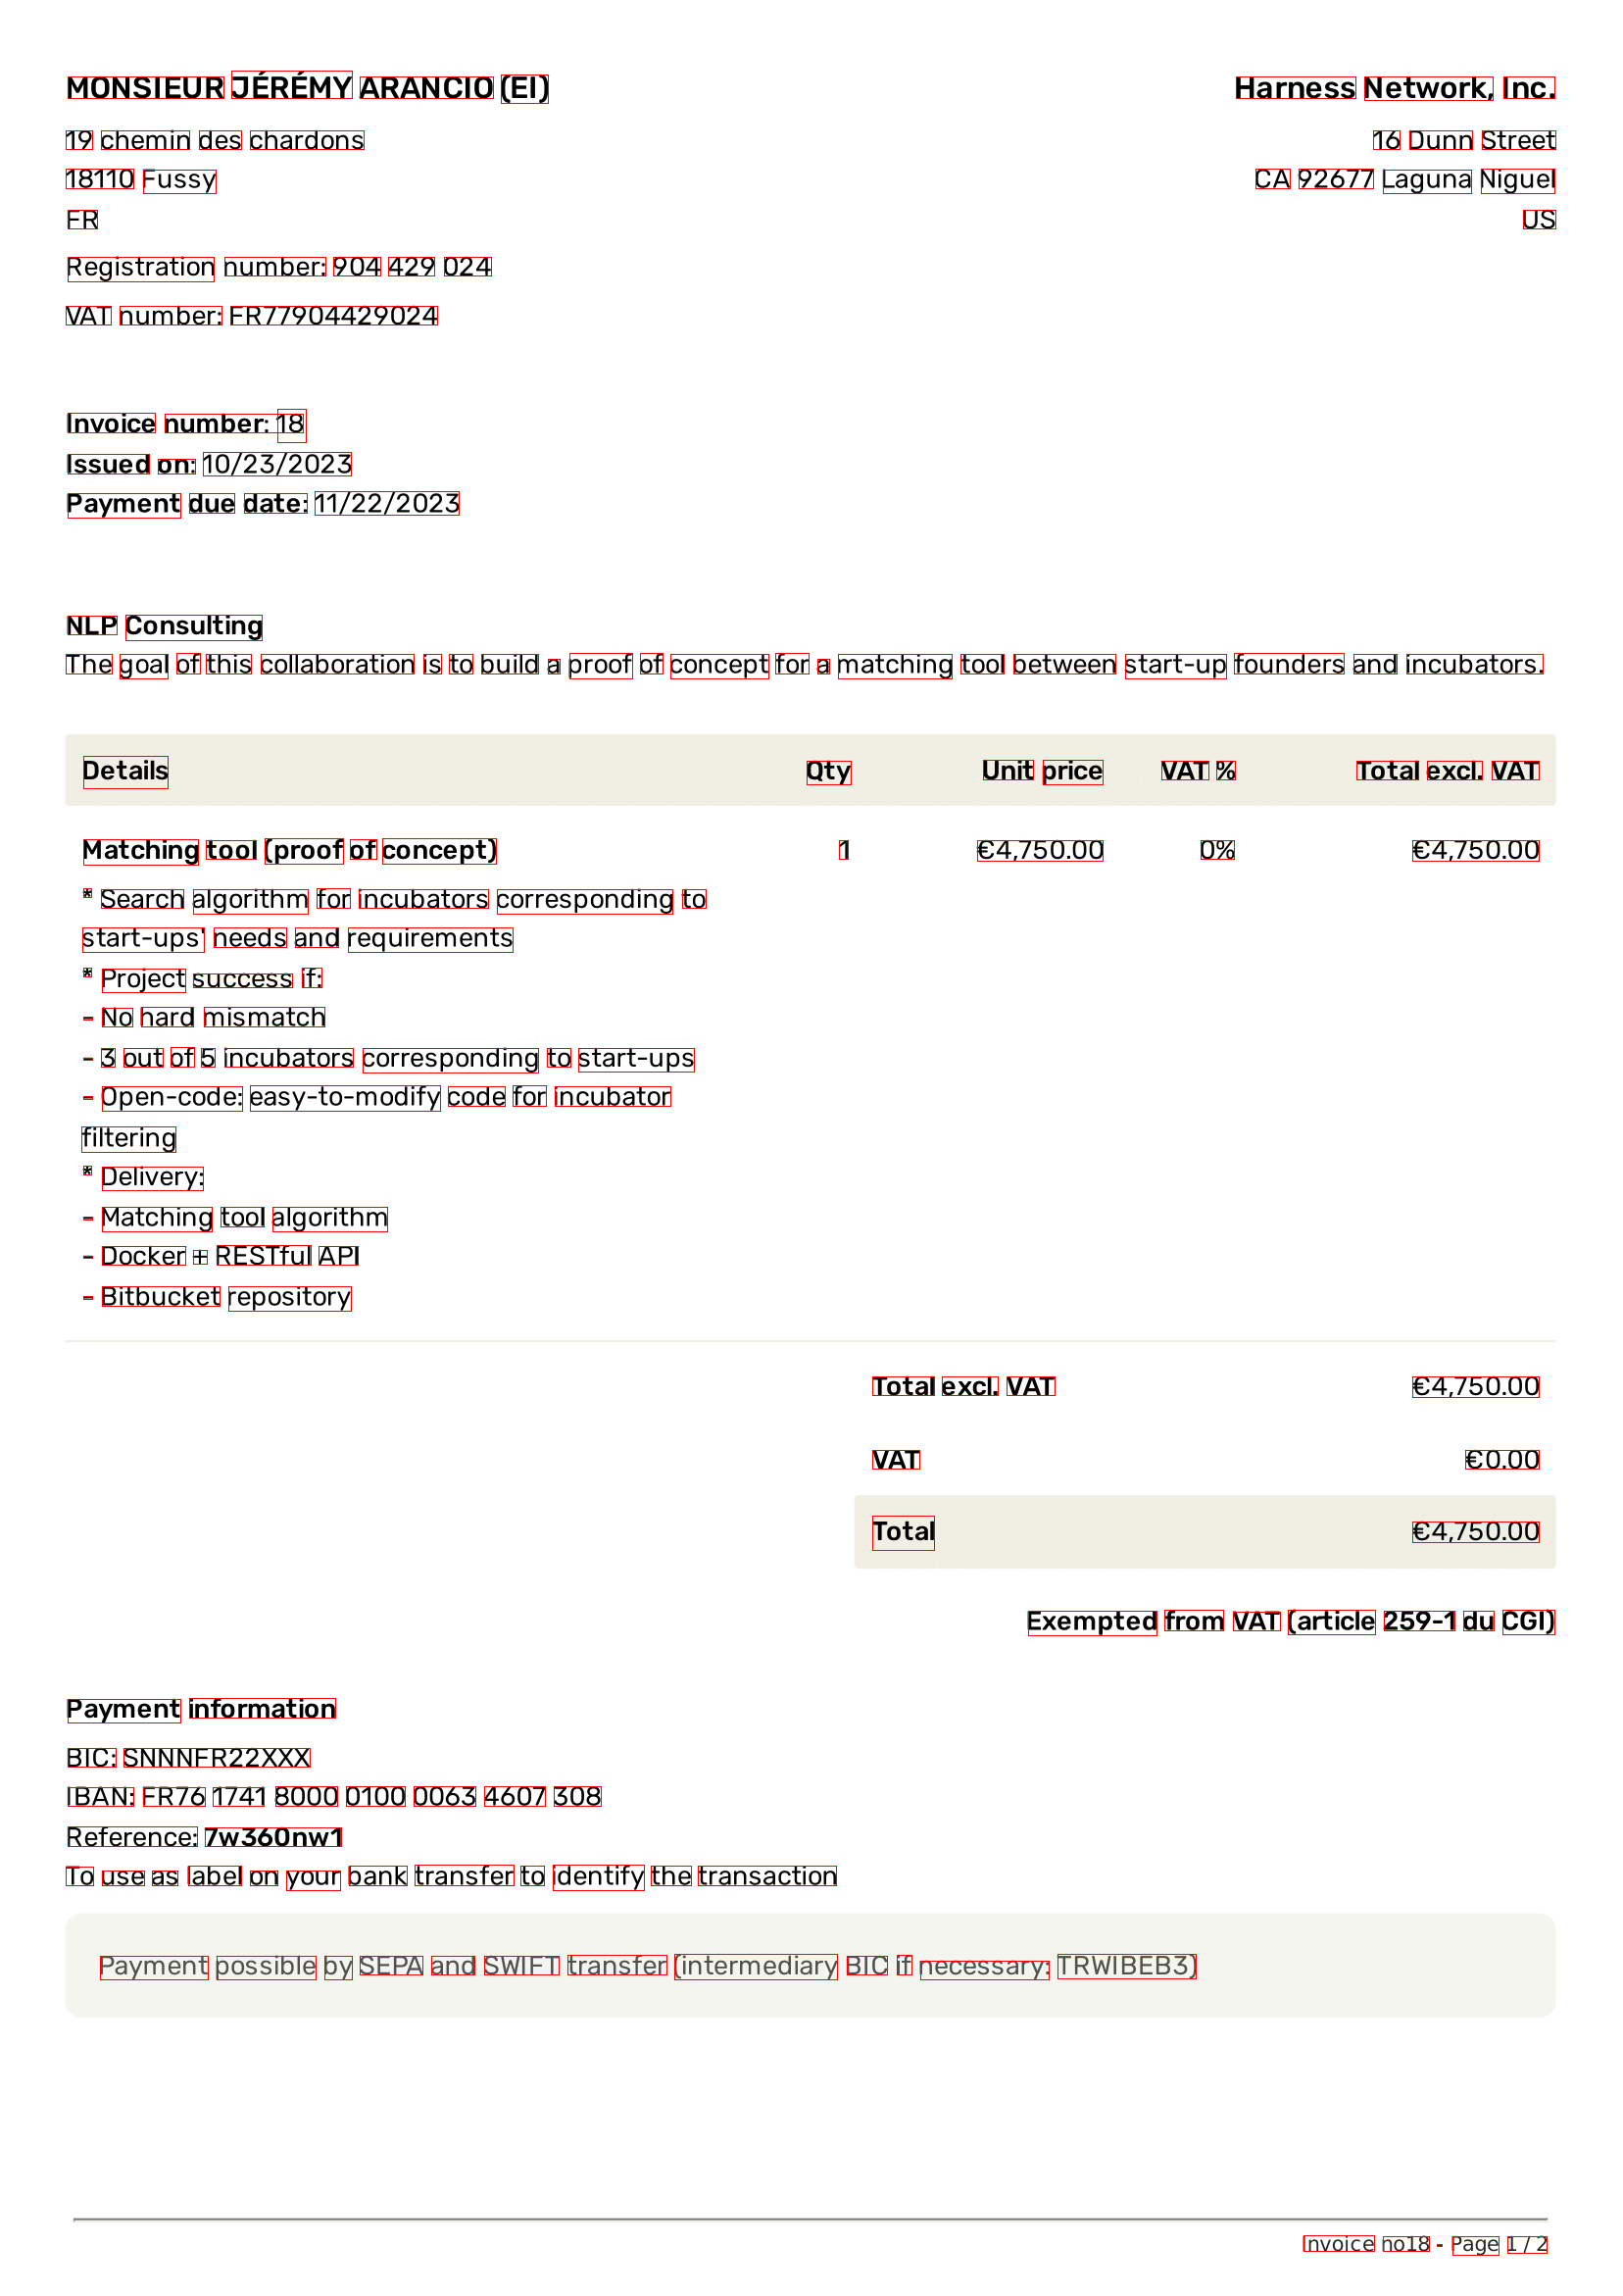

In [94]:
# For each word
image = Image.open(REPO_DIR / ".private/invoice.png").convert("RGB")
draw = ImageDraw.Draw(image)
words_dict = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)
print(words_dict.keys())
words = [{k: v[i] for k, v in words_dict.items()} for i, _ in enumerate(words_dict["text"])]
for word in words:
    if word["text"].strip() != '':
        x, y, w, h = word['left'], word['top'], word['width'], word['height']
        draw.rectangle([x, y, x + w, y + h], outline="red")
image